In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\sreeh\DSA\Data-sets\car_age_price.csv')

In [3]:
#display the dataframe
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
# Separate the feature (year) and target variable (price)
x = df['Year'].values.reshape(-1,1)
y = df['Price']

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=65421)

In [6]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [7]:
# Train a lasso regression model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=10000) #Setting a high alpha to because of the magnitude of the target variable
lasso_model.fit(x_train, y_train)

Lasso(alpha=10000)

In [8]:
# Compare the performance of the models using mean squared error (MSE) and R squared value
from sklearn.metrics import mean_squared_error,r2_score
linear_mse = mean_squared_error(y_test, linear_model.predict(x_test))
lasso_mse = mean_squared_error(y_test, lasso_model.predict(x_test))
linear_r_square = r2_score(y_test,linear_model.predict(x_test))
lasso_r_square = r2_score(y_test,lasso_model.predict(x_test))

In [9]:
# Print the MSE values and R squared value
print("Linear Regression MSE:", linear_mse)
print("Lasso Regression MSE:", lasso_mse)
print("Linear Regression R squared:", linear_r_square)
print("Lasso Regression R squared:", lasso_r_square)

Linear Regression MSE: 3394539626.4227023
Lasso Regression MSE: 3340104297.217991
Linear Regression R squared: 0.5095435259575976
Lasso Regression R squared: 0.5174085570261008


In [10]:
# Predict the price of a 2022 model using both models
year_2022 = [[2022]]
linear_prediction = linear_model.predict(year_2022)
lasso_prediction = lasso_model.predict(year_2022)
print("Linear Regression Prediction:", linear_prediction[0])
print("Lasso Regression Prediction:", lasso_prediction[0])

Linear Regression Prediction: 726374.1732367575
Lasso Regression Prediction: 707017.7258370966


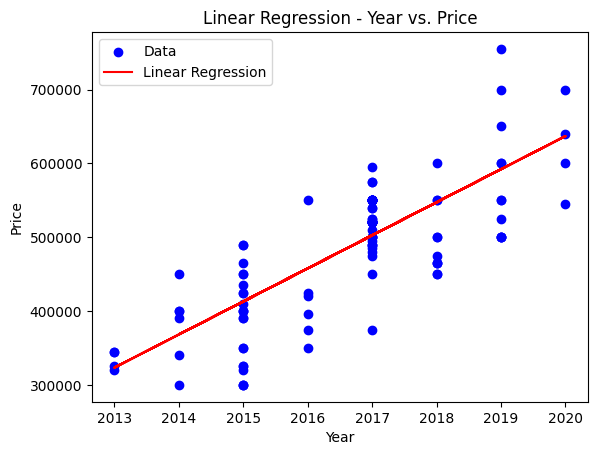

In [11]:
#plotting linear regression

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_train, linear_model.predict(x_train), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression - Year vs. Price')

# Show the legend
plt.legend()

# Display the plot
plt.show()

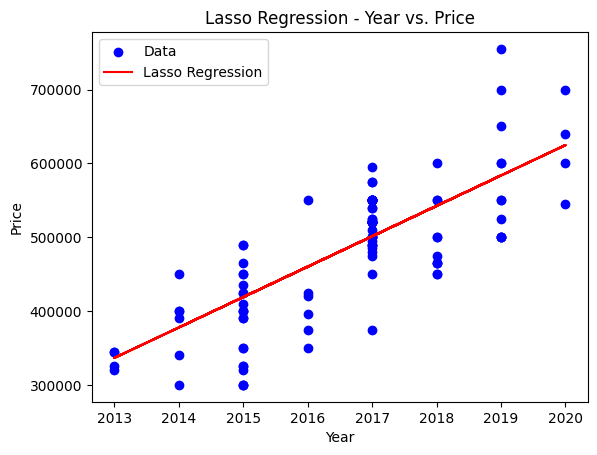

In [12]:
#plotting lasso regression

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_train, lasso_model.predict(x_train), color='red', label='Lasso Regression')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression - Year vs. Price')

# Show the legend
plt.legend()

# Display the plot
plt.show()

### Observations

1. There is one independent feature in the dataset and 1 dependent feature.
2. The values of MSE for linear and lasso regression are very similar. So are the r squared values. 
   This indicates that when it comes to a single feature difference between linear and lasso regression is negligible.
3. Even with a high alpha(the reason being the high magnitude of the dependent variable), lasso regression doesn't perform        better than linear regression.  
4. The predicted value of 2022 model in linear regression is 726374.
5. The predicted value of 2022 model in lasso regression is 707018.